**Import Libraries**

In [187]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime as dt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.preprocessing.sequence import TimeseriesGenerator


**Data Analysis**

Les données sont obtenues du dépôt Github de l’université de Johns Hopkins https://github.com/CSSEGISandData/COVID-19. https://github.com/CSSEGISandData/COVID19/tree/master/csse_covid_19_data/csse_covid_19_time_series  

In [188]:
path_data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
data_files = ["time_series_covid19_confirmed_global.csv", "time_series_covid19_deaths_global.csv", "time_series_covid19_recovered_global.csv"]

url_confirmed = os.path.join(path_data, data_files[0])
url_deaths = os.path.join(path_data, data_files[1])
url_recovered = os.path.join(path_data, data_files[2])

df_confirmed = pd.read_csv(url_confirmed)
df_deaths = pd.read_csv(url_deaths)
df_recovered = pd.read_csv(url_recovered)

df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/22,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,177974,177974,178141,178257,178295,178352,178373,178387,178418,178457
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274191,274219,274219,274272,274320,274376,274429,274462,274504,274520
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265720,265724,265727,265730,265731,265733,265738,265739,265739,265741
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40328,40328,40328,40328,40709,40709,40709,40709,40709,40709
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656287,656287,656287,656617,656617,656617,656617,656617,656617,656617
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11813,11813,11814,11814,11815,11815,11817,11817,11817,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,317483,317483,317804,317804,318113,318229,318404,318467,318515,318515


In [189]:
df_confirmed.describe(include = 'all')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/22,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22
count,89,284,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,...,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02
unique,89,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Australian Capital Territory,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,20.106368,21.958718,1.961268,2.313380,3.323944,5.059859,7.464789,10.31338,...,1.754590e+06,1.756589e+06,1.760015e+06,1.763694e+06,1.767355e+06,1.770768e+06,1.773278e+06,1.775223e+06,1.776708e+06,1.778361e+06
std,NaN,NaN,25.841453,75.893366,26.402603,26.499491,32.992032,45.919425,64.175242,86.46777,...,6.499259e+06,6.503063e+06,6.510965e+06,6.519992e+06,6.528355e+06,6.536763e+06,6.542678e+06,6.546879e+06,6.549777e+06,6.554194e+06
min,NaN,NaN,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.009525e+04,1.009725e+04,1.010025e+04,1.010400e+04,1.010925e+04,1.018650e+04,1.018925e+04,1.018925e+04,1.018925e+04,1.018925e+04
50%,NaN,NaN,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,8.566100e+04,8.582650e+04,8.582850e+04,8.582950e+04,8.583350e+04,8.583900e+04,8.584400e+04,8.584700e+04,8.584800e+04,8.584950e+04
75%,NaN,NaN,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,8.452270e+05,8.468568e+05,8.473230e+05,8.499848e+05,8.500652e+05,8.500652e+05,8.500652e+05,8.500652e+05,8.500652e+05,8.503900e+05


La latitude et la longitude ne contribuent pas à notre analyse, nous allons donc supprimer ces 2 colonnes.
D'après la description de notre ensemble de données, nous pouvons voir que nous avons 284 lignes, mais le nombre de valeurs uniques de la colonne Country/Region est de 198 (puisque certains pays sont répartis entre leurs provinces), nous devrons donc fusionner leurs données pour obtenir le infection totale de chaque pays par jour.

In [190]:
def preprocessing_data(df):
  # La latitude et la longitude ne contribuent pas à notre analyse
  # nous allons donc supprimer ces 2 colonnes.
  df.drop(['Lat', 'Long'], axis=1, inplace = True)

  # nous devrons donc fusionner les données 
  # pour obtenir le infection totale de chaque pays par jour.
  df = df.groupby('Country/Region').sum()

  df = df.transpose().reset_index().rename(columns={'index':'Date'})
  df.rename_axis(None, axis=1,inplace=True)
  df['Date'] = pd.to_datetime(df['Date'])
  return df


In [191]:
df_confirmed = preprocessing_data(df_confirmed)
df_deaths = preprocessing_data(df_deaths)
df_recovered = preprocessing_data(df_recovered)

df_confirmed

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2022-04-14,178352,274376,265733,40709,99194,11,7535,9059351,422721,...,895240,238176,5543,521880,10320599,656617,535,11815,318229,247208
814,2022-04-15,178373,274429,265738,40709,99194,11,7535,9059944,422729,...,895451,238214,6109,521946,10394533,656617,535,11817,318404,247237
815,2022-04-16,178387,274462,265739,40709,99194,11,7535,9060495,422747,...,895592,238252,6314,522034,10417887,656617,535,11817,318467,247237
816,2022-04-17,178418,274504,265739,40709,99194,11,7539,9060923,422762,...,895775,238288,6332,522042,10432547,656617,535,11817,318515,247278


On va visualiser le taux d'infection de les différence pays échantillons, l'Inde, l'Italie, les États-Unis, l'Australie, la France, ...

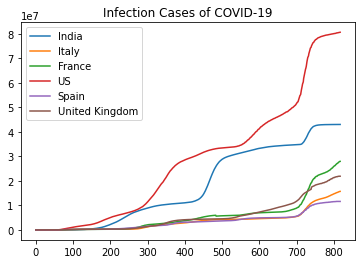

In [192]:
liste_Pays = ['India', 'Italy', 'France', 'US', 'Spain', 'United Kingdom']
for i in liste_Pays:
  df_confirmed[i].plot()

plt.legend()
plt.title('Infection Cases of COVID-19')
plt.show()

In [193]:
# Choose 1 country for prediction
def choose_country(name_country):
  data_C = df_confirmed[['Date',name_country]]
  data_C.rename(columns={name_country:"Confirmed"}, inplace =True)

  data_D = df_deaths[['Date',name_country]]
  data_D.rename(columns={name_country:"Deaths"}, inplace =True)

  data_R = df_recovered[['Date',name_country]]
  data_R.rename(columns={name_country:"Recovered"}, inplace =True)

  return data_C, data_D, data_R

Choix le pays pour la prédiction.
Ici, on choisit la France


In [194]:
# C - confirmed; D - death; R - recovered
data_C, data_D, data_R = choose_country("France")  
# %unload_ext google.colab.data_table
data_C

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,2
3,2020-01-25,3
4,2020-01-26,3
...,...,...
813,2022-04-14,27637292
814,2022-04-15,27762686
815,2022-04-16,27874269
816,2022-04-17,27960919


In [195]:
# data_R.drop(data_R[(data_R['Recovered'] == 0) & (data_R.index > data_R['Recovered'].idxmax())].index, inplace = True)

Préparer les ensembles de données d’apprentissage pour chaque série temporelle.2/3 de données pour l’entrainement et 1/3 pour le test.


In [196]:
data_confirmed = data_C['Confirmed'].to_numpy()
data_deaths = data_D['Deaths'].to_numpy()
data_recovered = data_R['Recovered'].to_numpy()

numbers_of_dates_confirmed = data_C.index.values.reshape(-1,1)
numbers_of_dates_deaths = data_D.index.values.reshape(-1,1)
numbers_of_dates_recovered = data_R.index.values.reshape(-1,1)

# Prediction Covid_confirmed cases for the next n days
nb_future_pre = 15  # Prediction for next 15 days
days_start_to_futures = np.array([i for i in range(data_C.shape[0]+nb_future_pre)]).reshape(-1, 1)

# Spit data
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(numbers_of_dates_confirmed,data_confirmed, test_size=0.15, shuffle=True)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(numbers_of_dates_deaths,data_deaths, test_size=0.15, shuffle=True)
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(numbers_of_dates_recovered,data_recovered, test_size=0.3, shuffle=False)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

#print(*zip(X_train_confirmed, y_train_confirmed))

(695, 1)
(695,)
(123, 1)
(123,)


**Linear regression**

In [197]:
def linear_regression(X_train, X_test, y_train, y_test):
  # poly features
  pf =PolynomialFeatures(degree=6,include_bias=True)

  # normalize splitted data
  poly_X_train = pf.fit_transform(X_train)
  poly_X_test = pf.fit_transform(X_test)
  poly_future_pre = pf.fit_transform(days_start_to_futures)
  #print(poly_X_train)

  # fit a Linear Regression model
  lin_regr=LinearRegression(normalize=True, fit_intercept=True)
  lin_regr.fit(poly_X_train, y_train)

  coef=lin_regr.coef_
  print("coef: ", coef)

  # Prediction
  y_pred = lin_regr.predict(poly_X_test)
  poly_pred = lin_regr.predict(poly_future_pre)

  # all values of predictions must > 0
  for i in range(len(y_pred)):
    if y_pred[i] < 0:
      y_pred[i] = 0
      
  # Plot prediction on test set
  plt.plot(y_test)
  plt.plot(y_pred)
  plt.legend(['Test Data', 'Predictions'])
  plt.show()

  # Calcul error
  mae=mean_absolute_error(y_pred, y_test)
  mse=mean_squared_error(y_pred, y_test)
  rmse = np.sqrt(mse)
  print("RMSE of ", lin_regr.__class__.__name__, round(rmse,1))
  print("MAE of ", lin_regr.__class__.__name__, round(mae,1), '\n')
  
  # all values of predictions must > 0
  for i in range(len(poly_pred)):
    if poly_pred[i] < 0:
      poly_pred[i] = 0

  return poly_pred

In [198]:
# function to plot prediction
def plot_prediction(name_model, prediction_data, type_data):
  if type_data == "Confirmed":
    data = data_C
  elif type_data == "Deaths":
    data = data_D
  elif type_data == "Recovered":
    data = data_R

  dates_pre = pd.date_range(start = data['Date'][0], periods=data.shape[0] + nb_future_pre)
  # print(dates_pre.shape)
  # print(prediction_data.shape)
  plt.figure(figsize= (12,8))
  plt.xlabel("Dates")
  plt.ylabel("France " +type_data +" cases")
  title = "Predicted values of " +type_data + " cases with " + name_model
  plt.title(title)

  plt.plot(data['Date'], data[type_data], linestyle ='--', color= 'blue')
  plt.plot(dates_pre, prediction_data, linestyle ='--', color = 'red')
  plt.legend(['Real_data', 'Predictions'])
  plt.show()

***1. Confirmed cases data***

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


coef:  [ 0.00000000e+00  7.56814327e+04 -1.01163168e+03  5.20843947e+00
 -1.16823179e-02  1.17652018e-05 -4.27874125e-09]


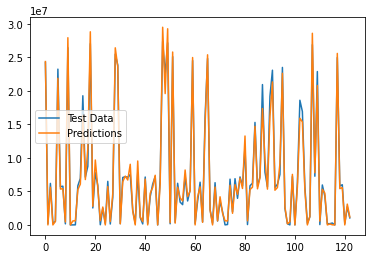

RMSE of  LinearRegression 998496.6
MAE of  LinearRegression 688586.4 



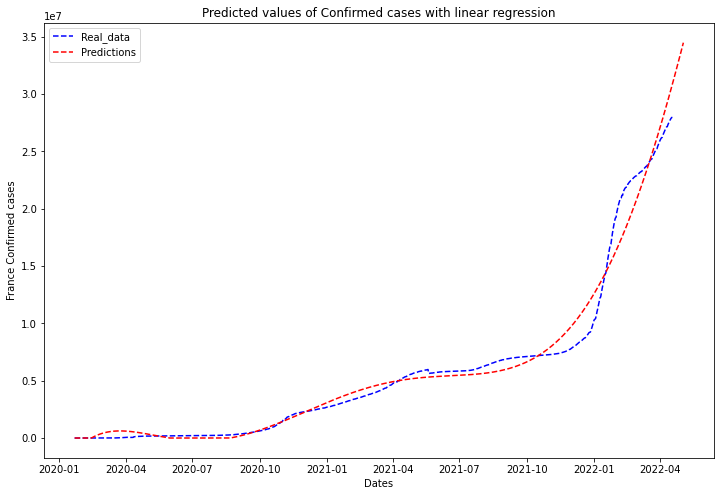

In [199]:
poly_pred_confirmed = linear_regression(X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed)

plot_prediction("linear regression", poly_pred_confirmed, "Confirmed")

***2. Deaths cases data***

coef:  [ 0.00000000e+00  9.54079920e+02 -8.80775614e+00  3.88226915e-02
 -7.73772338e-05  7.08604478e-08 -2.42822839e-11]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


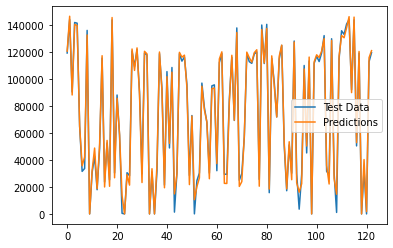

RMSE of  LinearRegression 4068.7
MAE of  LinearRegression 3020.1 



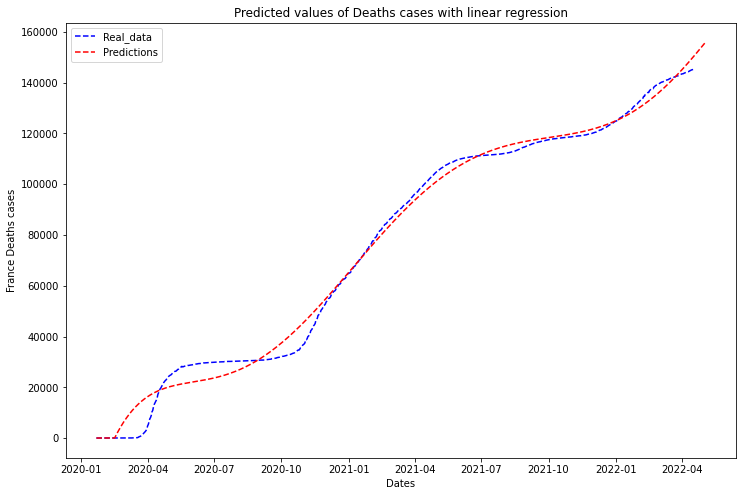

In [200]:
poly_pred_deaths = linear_regression(X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths)

plot_prediction("linear regression", poly_pred_deaths, "Deaths")

***3. Recovered cases data***

coef:  [ 0.00000000e+00  2.33294909e+03 -3.64709537e+01  2.94280304e-01
 -1.12466158e-03  2.02914169e-06 -1.37601121e-09]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


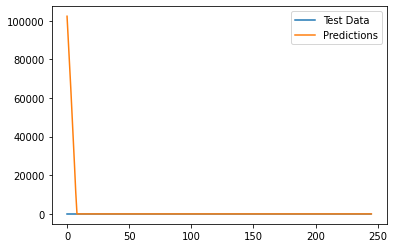

RMSE of  LinearRegression 11749.6
MAE of  LinearRegression 1884.4 



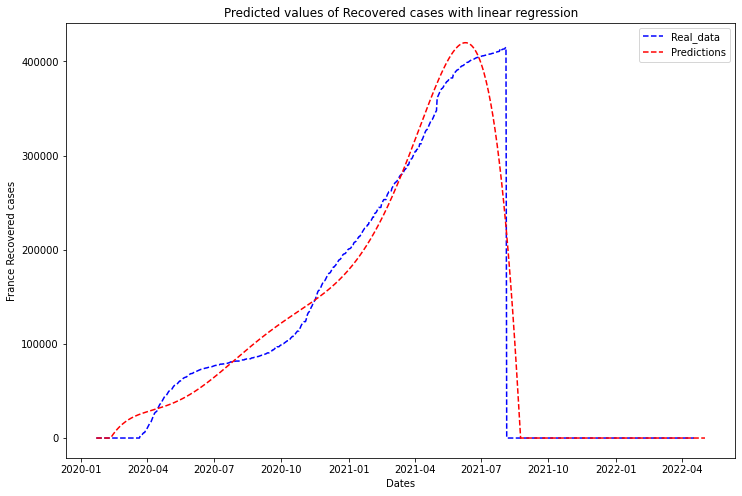

In [201]:
poly_pred_recovered = linear_regression(X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered)

plot_prediction("linear regression", poly_pred_recovered, "Recovered")

**Support vector machine regression(SVR)**

In [202]:
def svm_model(X_train, y_train, X_test, y_test):
  # SVM Model
  svm_reg = SVR(kernel='poly', C=0.5, gamma=0.01, epsilon=0.01)
  svm_reg.fit(X_train, y_train)

  y_pred = svm_reg.predict(X_test)
  svm_pred = svm_reg.predict(days_start_to_futures)
  # Plot
  plt.plot(y_test)
  plt.plot(y_pred)
  plt.legend(['Test Data', 'SVR Predictions'])

  mae=mean_absolute_error(y_pred, y_test)
  mse=mean_squared_error(y_pred, y_test)
  rmse = np.sqrt(mse)
  print("RMSE of ", svm_reg.__class__.__name__, round(rmse,1))
  print("MAE of ", svm_reg.__class__.__name__, round(mae,1), '\n')

  return svm_pred

***1. Confirmed cases data***

RMSE of  SVR 2477856.8
MAE of  SVR 1717171.1 



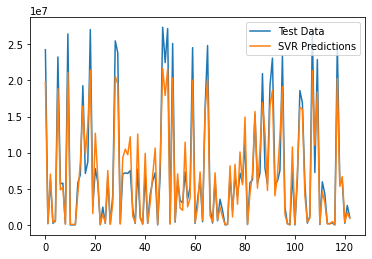

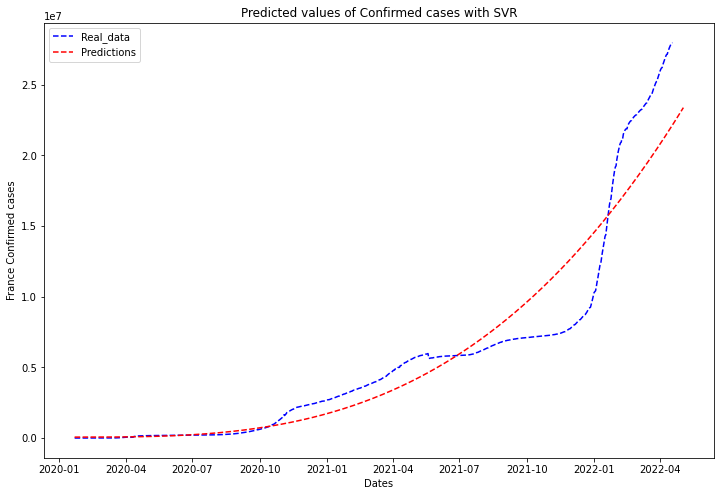

In [203]:
svm_pred_confirmed = svm_model(X_train_confirmed, y_train_confirmed, X_test_confirmed, y_test_confirmed)

plot_prediction("SVR", svm_pred_confirmed, "Confirmed")

***2. Deaths cases data***

RMSE of  SVR 24283.3
MAE of  SVR 19265.2 



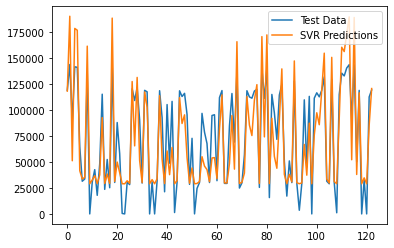

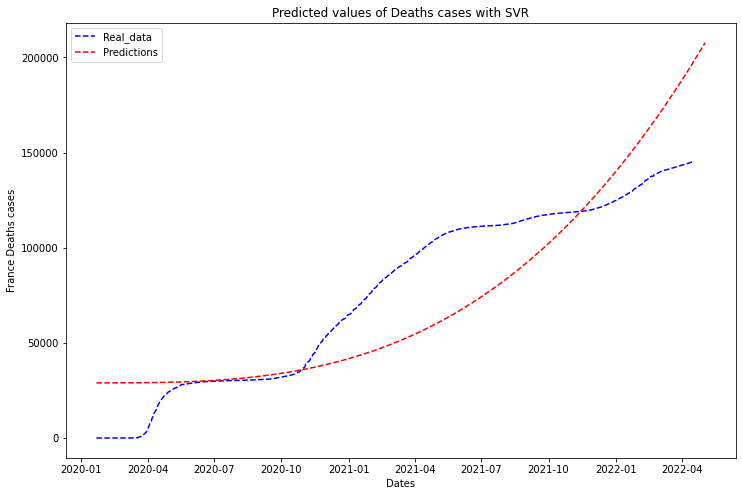

In [204]:
svm_pred_deaths = svm_model(X_train_deaths, y_train_deaths, X_test_deaths, y_test_deaths)

plot_prediction("SVR", svm_pred_deaths, "Deaths")

***3. Recovered cases data***

RMSE of  SVR 1054537.9
MAE of  SVR 1014781.1 



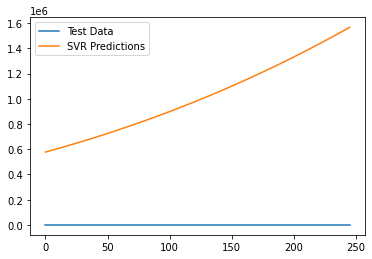

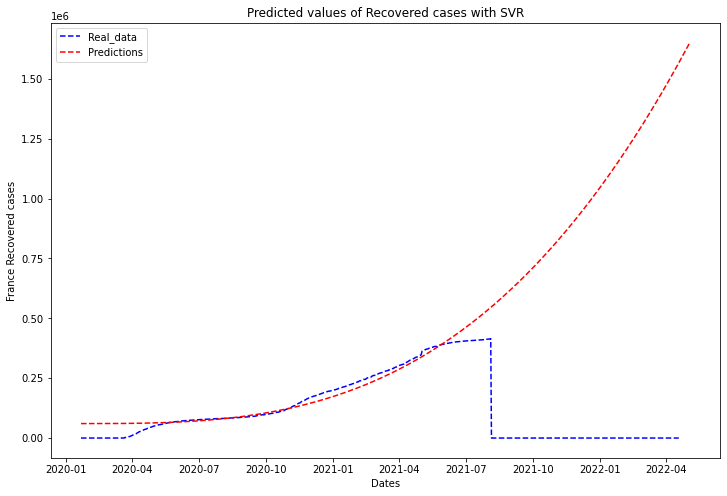

In [205]:
svm_pred_recovered = svm_model(X_train_recovered, y_train_recovered, X_test_recovered, y_test_recovered)

plot_prediction("SVR", svm_pred_recovered, "Recovered")

**Long Short-Term Memory network (LSTM) - univariate**

In [254]:
#Choose timesteps, features and number of days in future, ...
nb_steps = 10
nb_features = 1
nb_future_pre = 30
nb_node = 150
percent_split = 2/3

In [255]:
# Split data
normalizing = False
def split_data(data, nb_steps):
  if normalizing:
    # Normalizing data
    normal = MinMaxScaler()
    normal = normal.fit(data.reshape(-1,1))
    normal = normal.transform(data.reshape(-1,1))
  else : normal = data

  data_X, data_y = list(), list()
  #The batches would be [[t_1,...,t_{nb_steps}],predict=tt_{n_steps+1}].
  for i in range(len(normal)):  
    if i + nb_steps >= len(normal):
      break
    seq_x, seq_y = normal[i: i+nb_steps], normal[i+nb_steps]
    data_X.append(seq_x)
    data_y.append(seq_y)
  
  return np.asarray(data_X), np.asarray(data_y)

# Predict n days in future
def predict_future(model, data, nb_future_pre, nb_steps):
  y_preds = model.predict(data)
  for i in range(nb_future_pre):
    X = y_preds[-nb_steps:].reshape(1,nb_steps, nb_features)
    y = model.predict(X)
    #data = np.concatenate((data, y))
    y_preds = np.concatenate((y_preds, y))
  
  return y_preds

In [256]:
# Buil model
def buil_model(nb_node):
  model = Sequential()
  model.add(LSTM(nb_node, activation='relu', input_shape=(nb_steps, nb_features) ))
  model.add(Dense(75, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer="adam",loss="mse")
  model.summary()
  return model

In [257]:
# Create train and test set
train_size = int(percent_split*len(data_confirmed))

train_set_confirmed, test_set_confirmed = data_confirmed[:train_size], data_confirmed[train_size:]
train_set_deaths, test_set_deaths = data_deaths[:train_size], data_deaths[train_size:]
train_set_recovered, test_set_recovered = data_recovered[:train_size], data_recovered[train_size:]

X_train_confirmed, y_train_confirmed = split_data(train_set_confirmed, nb_steps)
X_test_confirmed, y_test_confirmed = split_data(test_set_confirmed, nb_steps)

X_train_deaths, y_train_deaths = split_data(train_set_deaths, nb_steps)
X_test_deaths, y_test_deaths = split_data(test_set_deaths, nb_steps)

X_train_recovered, y_train_recovered = split_data(train_set_recovered, nb_steps)
X_test_recovered, y_test_recovered = split_data(test_set_recovered, nb_steps)

In [258]:
def plot_loss_curve(history):
  # Plot Loss curve
  history_dict = history.history
  print(history_dict.keys())
  loss = history_dict['loss']
  #val_loss = history_dict['val_loss']
  epochs = range(1, len(loss)  + 1)

  plt.plot(epochs, loss, 'r', label='Training loss')
  #plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title("Training loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [259]:
def plot_pre_test_set(model, X_test, y_test):
  # plot prediction on Test set
  y_test_pred_C = model.predict(X_test)
  #print(y_test_pred_C)
  plt.plot(y_test)
  plt.plot(y_test_pred_C)
  plt.legend(['Test Data', 'LSTM prediction'])
  plt.title('Prediction on Test Data')
  plt.show()

In [260]:
def lstm_predict(model, data, type_data):
  data_X, data_y = split_data(data, nb_steps)
  lstm_pred = predict_future(model, data_X, nb_future_pre, nb_steps)

  if normalizing:
    normal = MinMaxScaler()
    normal = normal.fit(data.reshape(-1,1))
    lstm_pred = normal.inverse_transform(lstm_pred)

  # Plot prediction
  plt.xlabel("Dates")
  plt.ylabel("France " +type_data + " cases")
  plt.title("Predicted values of " + type_data + " cases with LSTM-univariate")
  plt.plot(data[nb_steps:], label='origin', linestyle ='--', color = 'red')
  plt.plot(lstm_pred.reshape(-1,1), label='predict', linestyle ='-', color= 'blue')
  plt.legend(['Real_data', 'Predictions'])
  plt.show()

***1. Model and prediction for Confirmed cases***

In [261]:
model_confirmed = buil_model(nb_node)

# fit model
history_confirmed = model_confirmed.fit(X_train_confirmed, y_train_confirmed, epochs=200,verbose=0)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 150)               91200     
                                                                 
 dense_48 (Dense)            (None, 75)                11325     
                                                                 
 dense_49 (Dense)            (None, 1)                 76        
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss'])


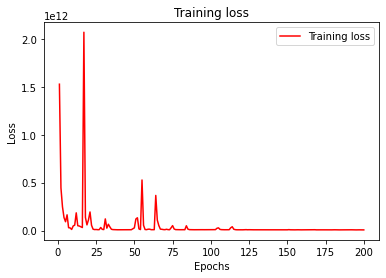

In [262]:
plot_loss_curve(history_confirmed)

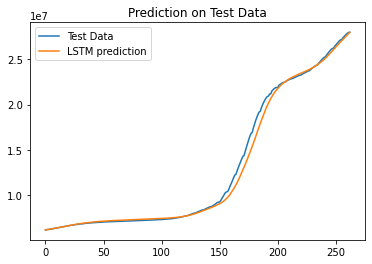

In [263]:
plot_pre_test_set(model_confirmed, X_test_confirmed, y_test_confirmed)

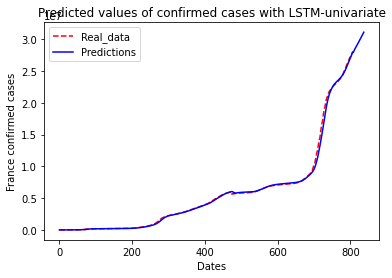

In [264]:
lstm_predict(model_confirmed, data_confirmed, "confirmed")

***2. Model and prediction for Deaths cases***

In [217]:
model_deaths = buil_model(nb_node)

# fit model
history_deaths = model_deaths.fit(X_train_deaths, y_train_deaths, epochs=200,verbose=0)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 150)               91200     
                                                                 
 dense_40 (Dense)            (None, 75)                11325     
                                                                 
 dense_41 (Dense)            (None, 1)                 76        
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss'])


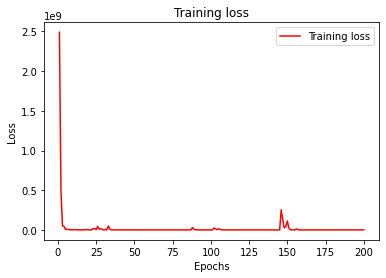

In [218]:
plot_loss_curve(history_deaths)

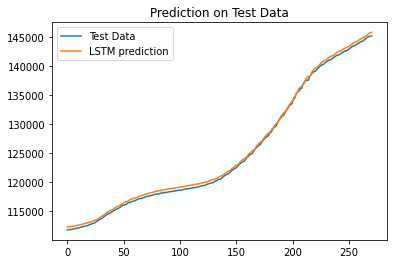

In [219]:
plot_pre_test_set(model_deaths, X_test_deaths, y_test_deaths)

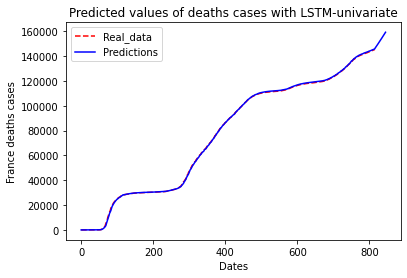

In [220]:
lstm_predict(model_deaths, data_deaths, "deaths")

***3. Model and prediction for Recovered cases***

In [221]:
model_recovered = buil_model(nb_node)

# fit model
history_recovered = model_recovered.fit(X_train_recovered, y_train_recovered, epochs=200,verbose=0)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 150)               91200     
                                                                 
 dense_42 (Dense)            (None, 75)                11325     
                                                                 
 dense_43 (Dense)            (None, 1)                 76        
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss'])


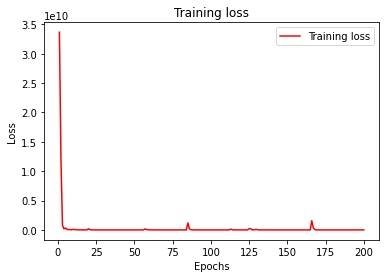

In [222]:
plot_loss_curve(history_recovered)

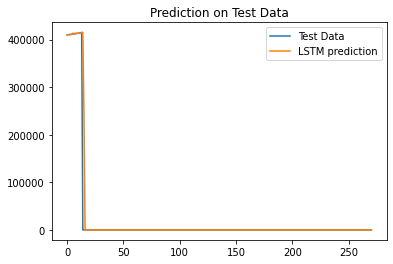

In [223]:
plot_pre_test_set(model_recovered, X_test_recovered, y_test_recovered)

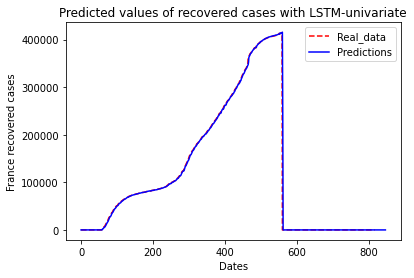

In [224]:
lstm_predict(model_recovered, data_recovered, "recovered")



---



**LSTM-Multivariate**

Merge data

In [294]:
df_merge = pd.merge(data_C, data_D, how='left', on=['Date'])
df_merge = pd.merge(df_merge, data_R, how='left', on=['Date'])

df_merge

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,2,0,0
3,2020-01-25,3,0,0
4,2020-01-26,3,0,0
...,...,...,...,...
813,2022-04-14,27637292,144947,0
814,2022-04-15,27762686,145098,0
815,2022-04-16,27874269,145159,0
816,2022-04-17,27960919,145194,0


We will add Column Age into our data. From data from internet, we have  Population ages 65 and above of France(percentage) : 20,8 % for 2020 and 21,1 % for 2021, and we will use 21,1 % for 2022 too.

In [295]:
df_merge['Age'] = 20.8
df_merge.loc[df_merge['Date'].dt.year.isin([2021,2022]), 'Age'] = 21.1

df_merge

,Date,Confirmed,Deaths,Recovered,Age
0,2020-01-22,0,0,0,20.8
1,2020-01-23,0,0,0,20.8
2,2020-01-24,2,0,0,20.8
3,2020-01-25,3,0,0,20.8
4,2020-01-26,3,0,0,20.8
...,...,...,...,...,...
813,2022-04-14,27637292,144947,0,21.1
814,2022-04-15,27762686,145098,0,21.1
815,2022-04-16,27874269,145159,0,21.1
816,2022-04-17,27960919,145194,0,21.1


In [296]:
df_merge.set_index("Date", inplace =True)

# Change columns's position to predict Deaths cases
# The first column will be "Deaths"
df_merge = df_merge[['Deaths', 'Confirmed', 'Recovered', 'Age']] 

df_merge

,Deaths,Confirmed,Recovered,Age
Date,,,,
2020-01-22,0,0,0,20.8
2020-01-23,0,0,0,20.8
2020-01-24,0,2,0,20.8
2020-01-25,0,3,0,20.8
2020-01-26,0,3,0,20.8
...,...,...,...,...
2022-04-14,144947,27637292,0,21.1
2022-04-15,145098,27762686,0,21.1
2022-04-16,145159,27874269,0,21.1


Visualization

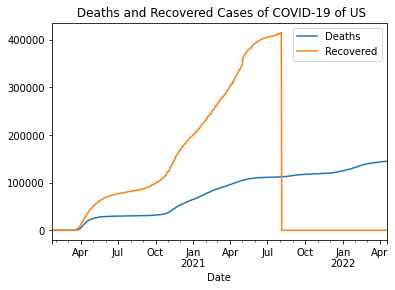

In [297]:
for i in ['Deaths', 'Recovered']:
  df_merge[i].plot()

plt.legend()
plt.title(' Deaths and Recovered Cases of COVID-19 of US')
plt.show()

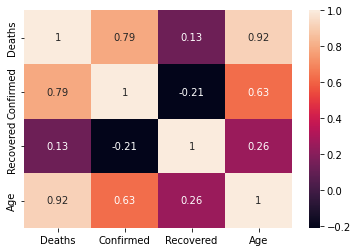

In [298]:
# Correlations

sns.heatmap(df_merge.corr(), annot = True)

From correlations, to predict **Deaths** cases, we will use 3 columns **Deaths**, **Confirmed** and **Age** and we will delete column **Recovered**

In [299]:
df_merge.drop(['Recovered'], axis=1, inplace = True)

df_merge

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Deaths,Confirmed,Age
Date,,,
2020-01-22,0,0,20.8
2020-01-23,0,0,20.8
2020-01-24,0,2,20.8
2020-01-25,0,3,20.8
2020-01-26,0,3,20.8
...,...,...,...
2022-04-14,144947,27637292,21.1
2022-04-15,145098,27762686,21.1
2022-04-16,145159,27874269,21.1


In [300]:
values = df_merge.values

# normalise data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

In [301]:
#convert data to supervised form

def to_supervised(data,time_step = 2):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,time_step+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    nb_features = data.shape[1]
    data = df.values
    supervised_data = data[:,:nb_features*time_step]
    supervised_data = np.column_stack( [supervised_data, data[:,nb_features*time_step]])
    return supervised_data

In [302]:
time_step = 2

supervised = to_supervised(scaled,time_step)
#print(supervised)
pd.DataFrame(supervised).head()

,0,1,2,3,4,5,6
0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0
1,0.0,0.000000e+00,0.0,0.0,7.147777e-08,0.0,0.0
2,0.0,7.147777e-08,0.0,0.0,1.072166e-07,0.0,0.0
3,0.0,1.072166e-07,0.0,0.0,1.072166e-07,0.0,0.0
4,0.0,1.072166e-07,0.0,0.0,1.072166e-07,0.0,0.0


In [303]:
# Split data
nb_features = df_merge.shape[1]
percent_split = 0.8
train_size = int(df_merge.shape[0]*percent_split)

X = supervised[:,:nb_features*time_step]
y = supervised[:,nb_features*time_step]
#print(y[0])
X_train = X[:train_size,:]
X_test = X[train_size:,:]
y_train = y[:train_size]
y_test = y[train_size:]

print (X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(654, 6) (162, 6) (654,) (162,)


In [304]:
#convert data to fit for lstm

X_train = X_train.reshape(X_train.shape[0], time_step, nb_features)
X_test = X_test.reshape(X_test.shape[0], time_step, nb_features)
print(X_train)
print (X_train.shape,X_test.shape)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 7.14777660e-08 0.00000000e+00]]

 [[0.00000000e+00 7.14777660e-08 0.00000000e+00]
  [0.00000000e+00 1.07216649e-07 0.00000000e+00]]

 ...

 [[8.17656050e-01 2.60279959e-01 1.00000000e+00]
  [8.17972763e-01 2.60615797e-01 1.00000000e+00]]

 [[8.17972763e-01 2.60615797e-01 1.00000000e+00]
  [8.18151774e-01 2.60940414e-01 1.00000000e+00]]

 [[8.18151774e-01 2.60940414e-01 1.00000000e+00]
  [8.18323901e-01 2.61285794e-01 1.00000000e+00]]]
(654, 2, 3) (162, 2, 3)


In [305]:
# Buil model
def buil_model(nb_node):
  model = Sequential()
  model.add(LSTM(nb_node, activation='relu', input_shape = ( time_step,nb_features) ))
  model.add(Dense(75, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer="adam",loss="mse")
  model.summary()
  return model

In [306]:
model = buil_model(nb_node = 150)
# fit model
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200,batch_size = 72,verbose=0)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 150)               92400     
                                                                 
 dense_54 (Dense)            (None, 75)                11325     
                                                                 
 dense_55 (Dense)            (None, 1)                 76        
                                                                 
Total params: 103,801
Trainable params: 103,801
Non-trainable params: 0
_________________________________________________________________


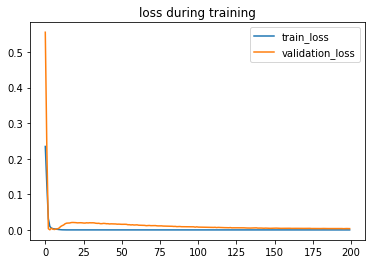

In [307]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.title("loss during training")
plt.show()

In [308]:
y_pred = model.predict(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2]*X_test.shape[1])

In [309]:
#scale back the prediction to orginal scale
temp = np.concatenate( (y_pred, X_test[:,1:nb_features] ) , axis =1)
temp = scaler.inverse_transform(temp)
test_pred = temp[:,0]

y_test = y_test.reshape( len(y_test), 1)

temp = np.concatenate( (y_test, X_test[:,1:nb_features] ) ,axis = 1)
temp = scaler.inverse_transform(temp)
real_data = temp[:,0]

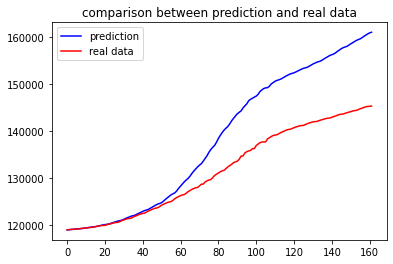

Mean absolute error : 6723.766346848305
Mean squared error : 77028791.93191461


In [310]:
#plot the prediction

plt.plot(test_pred, label = "prediction",c = "b")
plt.plot(real_data,label = "real data",c="r")
plt.title("comparison between prediction and real data")
plt.legend()
plt.show()

# Error
print("Mean absolute error : {}".format(mean_absolute_error(test_pred,real_data)) )
print("Mean squared error : {}".format(mean_squared_error(test_pred,real_data)) ) 

**Add "Confinement" feature**

Table of pandemic lockdowns : (data from https://en.wikipedia.org/wiki/COVID-19_lockdowns)

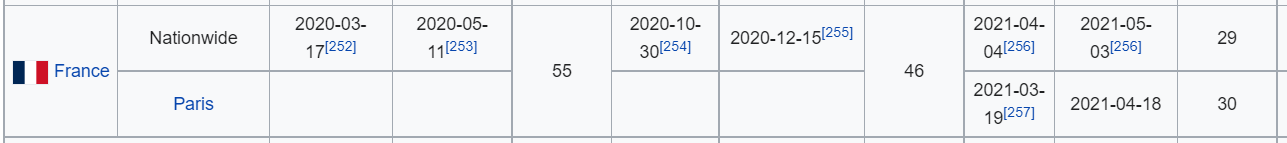

In [283]:
date_format = "%Y-%m-%d"

lockdown_1_start = dt.strptime('2020-03-17', date_format)
lockdown_1_end = dt.strptime('2020-05-11', date_format)

lockdown_2_start = dt.strptime('2020-10-30', date_format)
lockdown_2_end = dt.strptime('2020-12-15', date_format)

lockdown_3_start = dt.strptime('2021-04-04', date_format)
lockdown_3_end = dt.strptime('2021-05-03', date_format)

lockdown_1 = pd.date_range(start = lockdown_1_start, end = lockdown_1_end)
lockdown_2 = pd.date_range(start = lockdown_2_start, end = lockdown_2_end)
lockdown_3 = pd.date_range(start = lockdown_3_start, end = lockdown_3_end)

lockdown = lockdown_1.union(lockdown_2).union(lockdown_3)

Lockdown = 1 <-> non-confinement

Lockdown = 2 <-> confinement

In [284]:
df_merge['Lockdown'] = 1

df_merge.loc[df_merge.index.isin(lockdown), 'Lockdown'] = 2


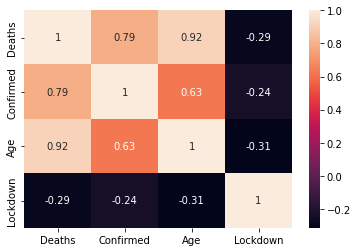

In [285]:
sns.heatmap(df_merge.corr(), annot = True)

In [286]:
values = df_merge.values

scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

In [287]:
time_step = 2

supervised = to_supervised(scaled,time_step)
#print(supervised)
pd.DataFrame(supervised).head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,0.0,0.000000e+00,0.0,0.0,0.0,7.147777e-08,0.0,0.0,0.0
2,0.0,7.147777e-08,0.0,0.0,0.0,1.072166e-07,0.0,0.0,0.0
3,0.0,1.072166e-07,0.0,0.0,0.0,1.072166e-07,0.0,0.0,0.0
4,0.0,1.072166e-07,0.0,0.0,0.0,1.072166e-07,0.0,0.0,0.0


In [288]:
# Split data
nb_features = df_merge.shape[1]
percent_split = 0.8
train_size = int(df_merge.shape[0]*percent_split)

X = supervised[:,:nb_features*time_step]
y = supervised[:,nb_features*time_step]
#print(y[0])
X_train = X[:train_size,:]
X_test = X[train_size:,:]
y_train = y[:train_size]
y_test = y[train_size:]

print (X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(654, 8) (162, 8) (654,) (162,)


In [289]:
#convert data to fit for lstm

X_train = X_train.reshape(X_train.shape[0], time_step, nb_features)
X_test = X_test.reshape(X_test.shape[0], time_step, nb_features)

print (X_train.shape,X_test.shape)

(654, 2, 4) (162, 2, 4)


In [290]:
model = buil_model(nb_node = 150)
# fit model
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200,batch_size = 72,verbose=0)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 150)               93000     
                                                                 
 dense_52 (Dense)            (None, 75)                11325     
                                                                 
 dense_53 (Dense)            (None, 1)                 76        
                                                                 
Total params: 104,401
Trainable params: 104,401
Non-trainable params: 0
_________________________________________________________________


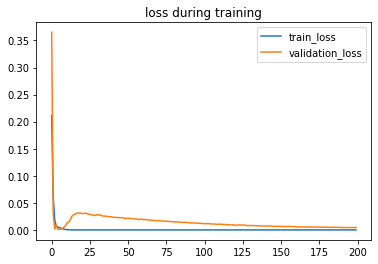

In [291]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.title("loss during training")
plt.show()

In [292]:
y_pred = model.predict(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2]*X_test.shape[1])

#scale back the prediction to orginal scale
temp = np.concatenate( (y_pred, X_test[:,1:nb_features] ) , axis =1)
temp = scaler.inverse_transform(temp)
test_pred = temp[:,0]

y_test = y_test.reshape( len(y_test), 1)

temp = np.concatenate( (y_test, X_test[:,1:nb_features] ) ,axis = 1)
temp = scaler.inverse_transform(temp)
real_data = temp[:,0]

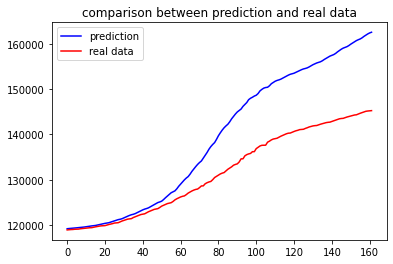

Mean absolute error : 7677.513398943124
Mean squared error : 95378517.63688865


In [293]:
#plot the prediction

plt.plot(test_pred, label = "prediction",c = "b")
plt.plot(real_data,label = "real data",c="r")
plt.title("comparison between prediction and real data")
plt.legend()
plt.show()

# Error
print("Mean absolute error : {}".format(mean_absolute_error(test_pred,real_data)) )
print("Mean squared error : {}".format(mean_squared_error(test_pred,real_data)) ) 